# Pandas time-series
Feb 15th 2022

In [213]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
# Config:
pd.options.display.float_format = '{:,.2f}'.format
plotsize = (13, 5)
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plt.rcParams['figure.figsize']= plotsize

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_1


## Read data
4 years of daily sales

In [2]:
df= pd.read_excel('data/sample-superstore.xls')
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [3]:
# Pring column names:
for i,j in enumerate(df.columns):
    print(i+1, j)

1 Row ID
2 Order ID
3 Order Date
4 Ship Date
5 Ship Mode
6 Customer ID
7 Customer Name
8 Segment
9 Country
10 City
11 State
12 Postal Code
13 Region
14 Product ID
15 Category
16 Sub-Category
17 Product Name
18 Sales
19 Quantity
20 Discount
21 Profit


### Simplify Time-series data
Total Sales by order date and category

In [4]:
variables= ['Order Date', 'Category', 'Sales']
df.loc[:, variables]

,Order Date,Category,Sales
0,2013-11-09,Furniture,261.96
1,2013-11-09,Furniture,731.94
2,2013-06-13,Office Supplies,14.62
3,2012-10-11,Furniture,957.58
4,2012-10-11,Office Supplies,22.37
...,...,...,...
9989,2011-01-22,Furniture,25.25
9990,2014-02-27,Furniture,91.96
9991,2014-02-27,Technology,258.58
9992,2014-02-27,Office Supplies,29.60


In [5]:
# Group_by date and category and important feat sales:
base= df.groupby(['Order Date', 'Category'], as_index= False)['Sales'].sum()
base

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.45
1,2011-01-05,Office Supplies,288.06
2,2011-01-06,Office Supplies,19.54
3,2011-01-07,Furniture,"2,573.82"
4,2011-01-07,Office Supplies,685.34
...,...,...,...
2859,2014-12-30,Office Supplies,282.44
2860,2014-12-30,Technology,302.38
2861,2014-12-31,Furniture,323.14
2862,2014-12-31,Office Supplies,299.72


In [6]:
base.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

Let's check the number of years we have in this dataset

In [7]:
# Unique years we have in the dataset:
np.unique(np.array(base['Order Date'], dtype= 'datetime64[Y]'))

array(['2011', '2012', '2013', '2014'], dtype='datetime64[Y]')

In [9]:
# Monthly
tmp= np.unique(np.array(base['Order Date'], dtype= 'datetime64[M]'))
tmp

48


array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype='datetime64[M]')

In [11]:
print('Theoretical num. months:', 12*4)
print('Number of months:', len(tmp))

Theoretical num. months: 48
Number of months: 48


In [12]:
print(base['Category'].unique())

['Office Supplies' 'Furniture' 'Technology']


## Working with the Pandas DatetimeIndex

In [13]:
# Way easier to work with DatetimeIndex
base.set_index('Order Date', inplace= True)

In [14]:
base

,Category,Sales
Order Date,,
2011-01-04,Office Supplies,16.45
2011-01-05,Office Supplies,288.06
2011-01-06,Office Supplies,19.54
2011-01-07,Furniture,"2,573.82"
2011-01-07,Office Supplies,685.34
...,...,...
2014-12-30,Office Supplies,282.44
2014-12-30,Technology,302.38
2014-12-31,Furniture,323.14


In [22]:
display(base.loc['2011'].tail())
display(base[base['Category'] == 'Technology'].loc['2011'])
display(base[base['Category'] == 'Technology'].loc['2011':'2012-04'])
display(base[(base['Category'] == 'Technology') | (base['Category'] == 'Furniture')].loc['2014'])

,Category,Sales
Order Date,,
2011-12-30,Office Supplies,774.61
2011-12-30,Technology,874.28
2011-12-31,Furniture,"2,584.53"
2011-12-31,Office Supplies,308.73
2011-12-31,Technology,"2,360.01"


,Category,Sales
Order Date,,
2011-01-07,Technology,"1,147.94"
2011-01-10,Technology,31.20
2011-01-14,Technology,646.74
2011-01-16,Technology,149.95
2011-01-17,Technology,124.20
...,...,...
2011-12-24,Technology,"1,054.88"
2011-12-27,Technology,498.00
2011-12-29,Technology,"1,423.67"


,Category,Sales
Order Date,,
2011-01-07,Technology,"1,147.94"
2011-01-10,Technology,31.20
2011-01-14,Technology,646.74
2011-01-16,Technology,149.95
2011-01-17,Technology,124.20
...,...,...
2012-04-21,Technology,469.95
2012-04-22,Technology,88.78
2012-04-26,Technology,311.98


,Category,Sales
Order Date,,
2014-01-01,Technology,302.38
2014-01-02,Furniture,975.49
2014-01-03,Furniture,913.43
2014-01-03,Technology,712.29
2014-01-08,Technology,"3,059.98"
...,...,...
2014-12-29,Technology,14.85
2014-12-30,Furniture,"2,330.72"
2014-12-30,Technology,302.38


In [16]:
# Day of week= Monday=0, Sunday= 6
base['DayofWeek']= base.index.dayofweek 
display(base)
del(base['DayofWeek'])

,Category,Sales,DayofWeek
Order Date,,,
2011-01-04,Office Supplies,16.45,1
2011-01-05,Office Supplies,288.06,2
2011-01-06,Office Supplies,19.54,3
2011-01-07,Furniture,"2,573.82",4
2011-01-07,Office Supplies,685.34,4
...,...,...,...
2014-12-30,Office Supplies,282.44,1
2014-12-30,Technology,302.38,1
2014-12-31,Furniture,323.14,2


## Standardizing the DatetimeIndex
Some time-series applications require that data contain all periods and have a frequency assigned (freq= None)   
We need to ensure there are:
* No duplicate index values: **Pivot data**
* No missing index values

In [23]:
display(base.index)

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)

In [24]:
base.reset_index(inplace= True)
sales= base.pivot(index= 'Order Date', columns= 'Category', values= 'Sales').fillna(0)
sales

Category,Furniture,Office Supplies,Technology
Order Date,,,
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,288.06,0.00
2011-01-06,0.00,19.54,0.00
2011-01-07,"2,573.82",685.34,"1,147.94"
2011-01-08,76.73,10.43,0.00
...,...,...,...
2014-12-27,0.00,814.59,0.00
2014-12-28,0.00,13.25,164.39
2014-12-29,551.26,"1,091.24",14.85


In [25]:
print(sales.index)
print('Unique values:', len(sales.index.unique()))

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)
Unique values: 1238


## Generating a complete Index and Setting Frequency
Since we're using daily data, we would like to set a daily frequency

In [26]:
print(len(sales.index.unique()))
print(sales.index.min())
print(sales.index.max())
date_range= sales.index.max() - sales.index.min()
date_range

1238
2011-01-04 00:00:00
2014-12-31 00:00:00


Timedelta('1457 days 00:00:00')

In [27]:
new_index= pd.date_range(sales.index.min(), sales.index.max())
new_index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

In [28]:
new_sales= sales.reindex(new_index, fill_value= 0)
new_sales

Category,Furniture,Office Supplies,Technology
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,288.06,0.00
2011-01-06,0.00,19.54,0.00
2011-01-07,"2,573.82",685.34,"1,147.94"
2011-01-08,76.73,10.43,0.00
...,...,...,...
2014-12-27,0.00,814.59,0.00
2014-12-28,0.00,13.25,164.39
2014-12-29,551.26,"1,091.24",14.85
2014-12-30,"2,330.72",282.44,302.38


We can observe we have a daily frequency

In [29]:
new_sales.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

In [33]:
new_sales[(new_sales['Furniture'] == 0) & (new_sales['Technology'] == 0) & (new_sales['Office Supplies'] == 0)]

Category,Furniture,Office Supplies,Technology
2011-01-09,0.00,0.00,0.00
2011-01-13,0.00,0.00,0.00
2011-01-18,0.00,0.00,0.00
2011-01-23,0.00,0.00,0.00
2011-01-25,0.00,0.00,0.00
...,...,...,...
2014-09-28,0.00,0.00,0.00
2014-10-12,0.00,0.00,0.00
2014-10-19,0.00,0.00,0.00
2014-10-26,0.00,0.00,0.00


In [131]:
# new_sales.to_csv('processed_df/processed.df.csv')

## Resampling
Upsampling= moving to a lower frequency (i.e. from days to weeks)  
Downsampling= moving to a higher frequency (i.e. from years to months)

### Upsampling

In [40]:
display(new_sales)
sales_weekly= new_sales.resample('W').sum()
display(sales_weekly)

Category,Furniture,Office Supplies,Technology
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,288.06,0.00
2011-01-06,0.00,19.54,0.00
2011-01-07,"2,573.82",685.34,"1,147.94"
2011-01-08,76.73,10.43,0.00
...,...,...,...
2014-12-27,0.00,814.59,0.00
2014-12-28,0.00,13.25,164.39
2014-12-29,551.26,"1,091.24",14.85
2014-12-30,"2,330.72",282.44,302.38


Category,Furniture,Office Supplies,Technology
2011-01-09,"2,650.55","1,019.81","1,147.94"
2011-01-16,"1,003.78","2,039.35",827.89
2011-01-23,"1,747.33",871.08,824.13
2011-01-30,550.20,680.34,343.33
2011-02-06,290.67,502.68,649.86
...,...,...,...
2014-12-07,"12,105.63","6,908.44","8,420.87"
2014-12-14,"9,417.69","8,324.51","5,566.21"
2014-12-21,"4,198.33","6,401.86","2,410.45"
2014-12-28,"6,610.44","8,546.30","6,277.21"


In [52]:
print('Original DF')
display(new_sales)
# Monthly:
print('Monthly Sales')
sales_monthly= new_sales.resample('M').sum()
display(sales_monthly.head())
print(sales_monthly.shape)
# Quartely:
sales_quarterly = new_sales.resample('Q').sum()
print('Quarterly Sales')
display(sales_quarterly.head())
print(sales_quarterly.shape)
# Annual:
sales_annual = new_sales.resample('Y').sum()
print('Annual Sales')
display(sales_annual.head())
print(sales_annual.shape)

Original DF


Category,Furniture,Office Supplies,Technology
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,288.06,0.00
2011-01-06,0.00,19.54,0.00
2011-01-07,"2,573.82",685.34,"1,147.94"
2011-01-08,76.73,10.43,0.00
...,...,...,...
2014-12-27,0.00,814.59,0.00
2014-12-28,0.00,13.25,164.39
2014-12-29,551.26,"1,091.24",14.85
2014-12-30,"2,330.72",282.44,302.38


Monthly Sales


Category,Furniture,Office Supplies,Technology
2011-01-31,"5,951.86","4,851.08","3,143.29"
2011-02-28,"2,130.32","1,071.72","1,608.51"
2011-03-31,"14,573.96","8,605.88","32,511.17"
2011-04-30,"7,944.84","11,155.07","9,195.43"
2011-05-31,"6,912.79","7,135.62","9,599.88"


(48, 3)
Quarterly Sales


Category,Furniture,Office Supplies,Technology
2011-03-31,"22,656.14","14,528.68","37,262.97"
2011-06-30,"28,063.75","31,243.74","27,231.28"
2011-09-30,"41,957.88","53,923.97","47,751.37"
2011-12-31,"64,515.09","52,080.03","63,032.62"
2012-03-31,"27,374.10","23,059.39","18,418.25"


(16, 3)
Annual Sales


Category,Furniture,Office Supplies,Technology
2011-12-31,"157,192.85","151,776.41","175,278.23"
2012-12-31,"170,518.24","137,233.46","162,780.81"
2013-12-31,"198,901.44","183,510.59","226,061.80"
2014-12-31,"215,387.27","246,526.57","272,033.19"


(4, 3)


### Downsampling
Moving from annual to monthly for example, requires an option to fill in missing values. A common approach is the interpolate method (i.e. linear, spline, etc.)

In [56]:
display(sales_annual.resample('M').sum())
sales_monthly_from_annual= sales_annual.resample('M')
sales_monthly_from_annual.interpolate(method= 'spline', order= 3)

Category,Furniture,Office Supplies,Technology
2011-12-31,"157,192.85","151,776.41","175,278.23"
2012-01-31,0.00,0.00,0.00
2012-02-29,0.00,0.00,0.00
2012-03-31,0.00,0.00,0.00
2012-04-30,0.00,0.00,0.00
2012-05-31,0.00,0.00,0.00
2012-06-30,0.00,0.00,0.00
2012-07-31,0.00,0.00,0.00
2012-08-31,0.00,0.00,0.00
2012-09-30,0.00,0.00,0.00


Category,Furniture,Office Supplies,Technology
2011-12-31,"157,192.85","151,776.41","175,278.23"
2012-01-31,"157,062.62","147,084.68","168,957.77"
2012-02-29,"157,200.89","143,355.49","164,096.18"
2012-03-31,"157,611.09","140,049.01","159,969.03"
2012-04-30,"158,251.03","137,493.33","156,975.06"
2012-05-31,"159,147.30","135,491.87","154,859.29"
2012-06-30,"160,226.68","134,148.69","153,705.24"
2012-07-31,"161,545.08","133,348.07","153,380.57"
2012-08-31,"163,053.51","133,117.78","153,881.71"
2012-09-30,"164,678.67","133,412.61","155,099.38"


## Variable Transformation
Such as: log, differences, growth rate, etc.

In [65]:
### Difference
display(sales_monthly.head(12))
sales_monthly.diff().head(12)

Category,Furniture,Office Supplies,Technology
2011-01-31,"5,951.86","4,851.08","3,143.29"
2011-02-28,"2,130.32","1,071.72","1,608.51"
2011-03-31,"14,573.96","8,605.88","32,511.17"
2011-04-30,"7,944.84","11,155.07","9,195.43"
2011-05-31,"6,912.79","7,135.62","9,599.88"
2011-06-30,"13,206.13","12,953.04","8,435.97"
2011-07-31,"10,821.05","15,121.21","8,004.13"
2011-08-31,"7,320.35","11,379.46","9,209.66"
2011-09-30,"23,816.48","27,423.30","30,537.57"
2011-10-31,"12,304.25","7,211.13","11,938.02"


Category,Furniture,Office Supplies,Technology
2011-01-31,NaN,NaN,NaN
2011-02-28,"-3,821.54","-3,779.36","-1,534.78"
2011-03-31,"12,443.63","7,534.16","30,902.66"
2011-04-30,"-6,629.12","2,549.19","-23,315.74"
2011-05-31,"-1,032.05","-4,019.45",404.44
2011-06-30,"6,293.34","5,817.41","-1,163.91"
2011-07-31,"-2,385.07","2,168.17",-431.83
2011-08-31,"-3,500.70","-3,741.75","1,205.53"
2011-09-30,"16,496.13","16,043.84","21,327.91"
2011-10-31,"-11,512.23","-20,212.17","-18,599.55"


In [76]:
## Percentage difference
display(sales_monthly.head(12))
display(sales_monthly.pct_change().head(12))
sales_monthly.join(sales_monthly.pct_change().add_suffix('_%_change')).head(12)

Category,Furniture,Office Supplies,Technology
2011-01-31,"5,951.86","4,851.08","3,143.29"
2011-02-28,"2,130.32","1,071.72","1,608.51"
2011-03-31,"14,573.96","8,605.88","32,511.17"
2011-04-30,"7,944.84","11,155.07","9,195.43"
2011-05-31,"6,912.79","7,135.62","9,599.88"
2011-06-30,"13,206.13","12,953.04","8,435.97"
2011-07-31,"10,821.05","15,121.21","8,004.13"
2011-08-31,"7,320.35","11,379.46","9,209.66"
2011-09-30,"23,816.48","27,423.30","30,537.57"
2011-10-31,"12,304.25","7,211.13","11,938.02"


Category,Furniture,Office Supplies,Technology
2011-01-31,NaN,NaN,NaN
2011-02-28,-0.64,-0.78,-0.49
2011-03-31,5.84,7.03,19.21
2011-04-30,-0.45,0.30,-0.72
2011-05-31,-0.13,-0.36,0.04
2011-06-30,0.91,0.82,-0.12
2011-07-31,-0.18,0.17,-0.05
2011-08-31,-0.32,-0.25,0.15
2011-09-30,2.25,1.41,2.32
2011-10-31,-0.48,-0.74,-0.61


Category,Furniture,Office Supplies,Technology,Furniture_%_change,Office Supplies_%_change,Technology_%_change
2011-01-31,"5,951.86","4,851.08","3,143.29",NaN,NaN,NaN
2011-02-28,"2,130.32","1,071.72","1,608.51",-0.64,-0.78,-0.49
2011-03-31,"14,573.96","8,605.88","32,511.17",5.84,7.03,19.21
2011-04-30,"7,944.84","11,155.07","9,195.43",-0.45,0.30,-0.72
2011-05-31,"6,912.79","7,135.62","9,599.88",-0.13,-0.36,0.04
2011-06-30,"13,206.13","12,953.04","8,435.97",0.91,0.82,-0.12
2011-07-31,"10,821.05","15,121.21","8,004.13",-0.18,0.17,-0.05
2011-08-31,"7,320.35","11,379.46","9,209.66",-0.32,-0.25,0.15
2011-09-30,"23,816.48","27,423.30","30,537.57",2.25,1.41,2.32
2011-10-31,"12,304.25","7,211.13","11,938.02",-0.48,-0.74,-0.61


In [71]:
display(sales_monthly.head(12))
np.log(sales_monthly+1).head(12) 

Category,Furniture,Office Supplies,Technology
2011-01-31,"5,951.86","4,851.08","3,143.29"
2011-02-28,"2,130.32","1,071.72","1,608.51"
2011-03-31,"14,573.96","8,605.88","32,511.17"
2011-04-30,"7,944.84","11,155.07","9,195.43"
2011-05-31,"6,912.79","7,135.62","9,599.88"
2011-06-30,"13,206.13","12,953.04","8,435.97"
2011-07-31,"10,821.05","15,121.21","8,004.13"
2011-08-31,"7,320.35","11,379.46","9,209.66"
2011-09-30,"23,816.48","27,423.30","30,537.57"
2011-10-31,"12,304.25","7,211.13","11,938.02"


Category,Furniture,Office Supplies,Technology
2011-01-31,8.69,8.49,8.05
2011-02-28,7.66,6.98,7.38
2011-03-31,9.59,9.06,10.39
2011-04-30,8.98,9.32,9.13
2011-05-31,8.84,8.87,9.17
2011-06-30,9.49,9.47,9.04
2011-07-31,9.29,9.62,8.99
2011-08-31,8.90,9.34,9.13
2011-09-30,10.08,10.22,10.33
2011-10-31,9.42,8.88,9.39


### Rolling Average and Windows
Smoothing our data

In [91]:
print(new_sales.index.min())
print(np.mean([2573.82,76.73,0,0,0,0,0]).round(2))
window_size= 7
rolling_window= new_sales.rolling(window= window_size)
# Average each week
display(new_sales.head(7))
rolling_window.mean().dropna().head()

2011-01-04 00:00:00
378.65


Category,Furniture,Office Supplies,Technology
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,288.06,0.00
2011-01-06,0.00,19.54,0.00
2011-01-07,"2,573.82",685.34,"1,147.94"
2011-01-08,76.73,10.43,0.00
2011-01-09,0.00,0.00,0.00
2011-01-10,0.00,9.34,31.20


Category,Furniture,Office Supplies,Technology
2011-01-10,378.65,147.02,168.45
2011-01-11,386.07,145.09,168.45
2011-01-12,387.49,103.93,168.45
2011-01-13,387.49,101.14,168.45
2011-01-14,145.51,292.83,96.85


In [95]:
rolling_window.std().dropna().head(window_size)

Category,Furniture,Office Supplies,Technology
2011-01-10,968.40,258.91,432.07
2011-01-11,965.21,260.10,432.07
2011-01-12,964.55,256.47,432.07
2011-01-13,964.55,257.64,432.07
2011-01-14,325.26,764.76,242.76
2011-01-15,325.83,765.41,242.76
2011-01-16,325.83,765.41,239.38


In [101]:
display(new_sales.head())
new_sales.cumsum().dropna().head()

Category,Furniture,Office Supplies,Technology
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,288.06,0.00
2011-01-06,0.00,19.54,0.00
2011-01-07,"2,573.82",685.34,"1,147.94"
2011-01-08,76.73,10.43,0.00


Category,Furniture,Office Supplies,Technology
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,304.51,0.00
2011-01-06,0.00,324.04,0.00
2011-01-07,"2,573.82","1,009.38","1,147.94"
2011-01-08,"2,650.55","1,019.81","1,147.94"


## Visualization

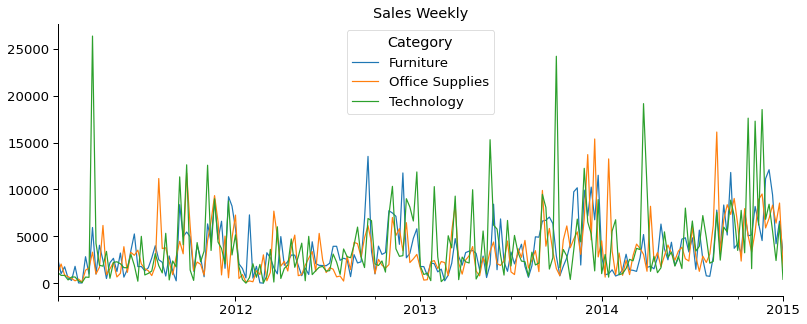

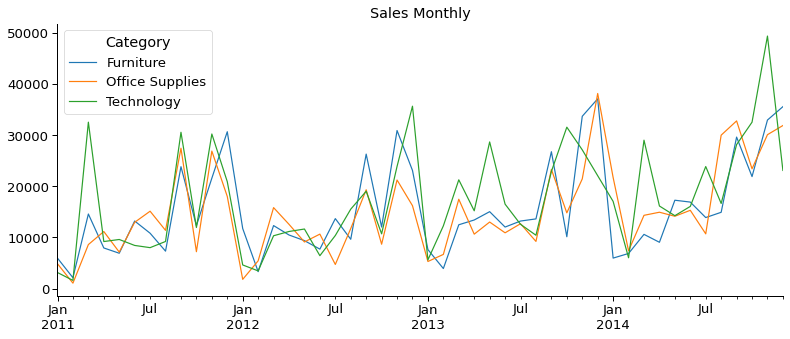

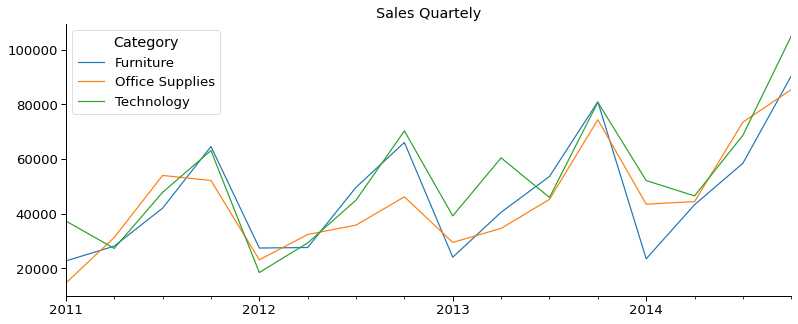

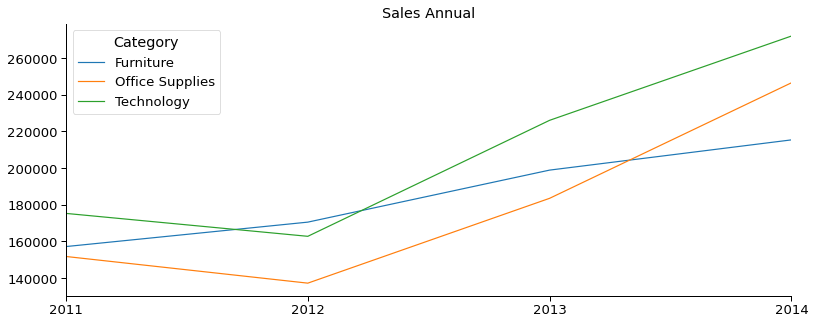

In [128]:
# new_sales.plot()
sales_weekly.plot(title= 'Sales Weekly')

sales_monthly.plot(title= 'Sales Monthly')

sales_quarterly.plot(title= 'Sales Quartely')

sales_annual.plot(title= 'Sales Annual')

plt.show()

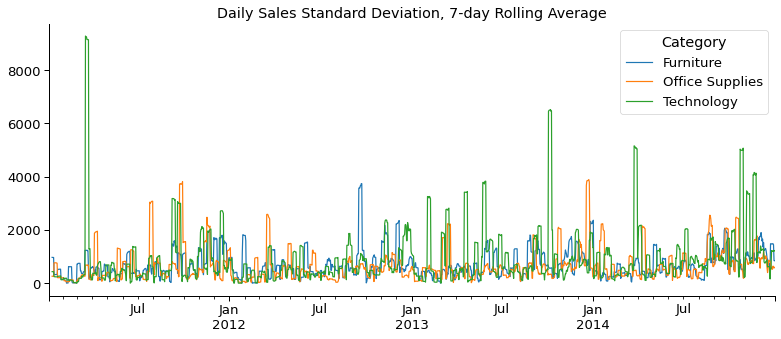

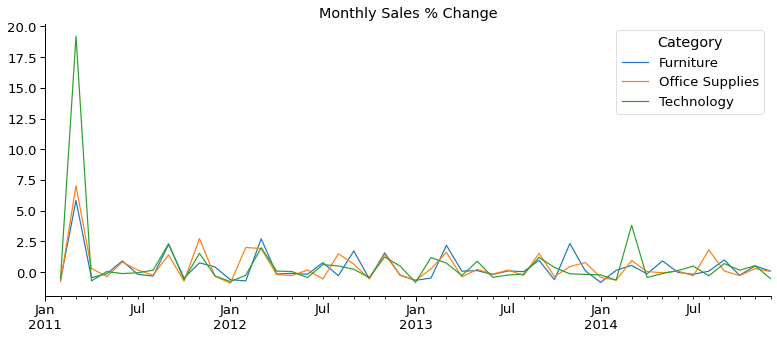

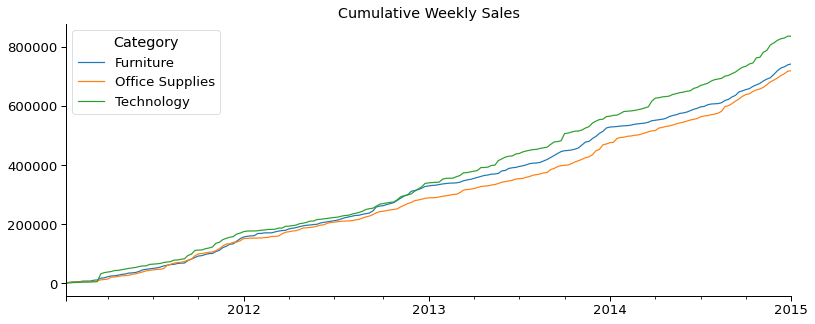

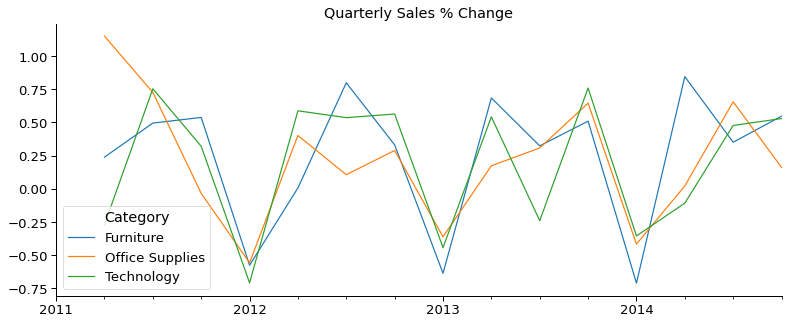

In [133]:
rolling_window.std().plot(title='Daily Sales Standard Deviation, 7-day Rolling Average')

# Monthly Sales Percent Change
sales_monthly.pct_change().plot(title='Monthly Sales % Change')

# Cumulative Weekly Sales
sales_weekly.cumsum().plot(title='Cumulative Weekly Sales')

# Quarterly Sales Growth
sales_quarterly.pct_change().plot(title='Quarterly Sales % Change')

plt.show()

## Time-series visualizations
ACF and PACF= if there's a correlation between one period and the next  
ACF= we care about the indirect and direct effects  
PACF= we only care about the direct effect => **AR models**

Category,Furniture,Office Supplies,Technology
2011-01-04,0.00,16.45,0.00
2011-01-05,0.00,288.06,0.00
2011-01-06,0.00,19.54,0.00
2011-01-07,"2,573.82",685.34,"1,147.94"
2011-01-08,76.73,10.43,0.00


/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


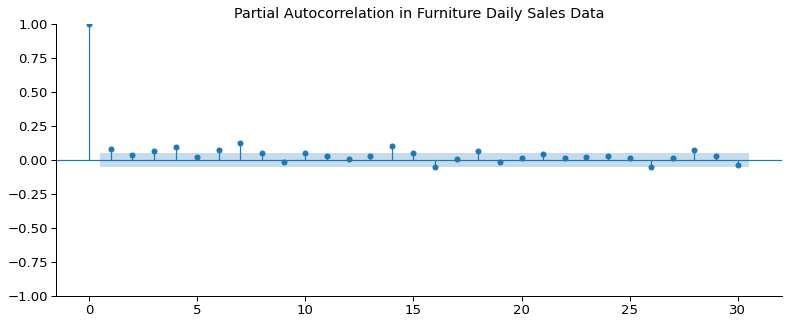

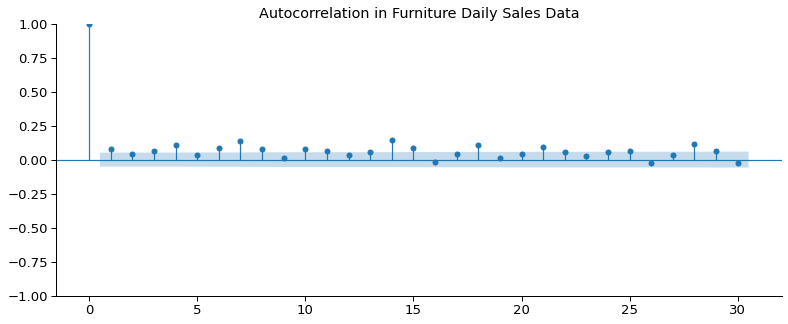

In [152]:
# How much it correlate with the past value
display(new_sales.head())
pacf_plot= plot_pacf(new_sales['Furniture'], lags= 30, title= "Partial Autocorrelation in Furniture Daily Sales Data")
acf_plot= plot_acf(new_sales['Furniture'], lags= 30, title= "Autocorrelation in Furniture Daily Sales Data")

Category,Furniture,Office Supplies,Technology
2011-01-09,"2,650.55","1,019.81","1,147.94"
2011-01-16,"1,003.78","2,039.35",827.89
2011-01-23,"1,747.33",871.08,824.13
2011-01-30,550.20,680.34,343.33
2011-02-06,290.67,502.68,649.86


/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


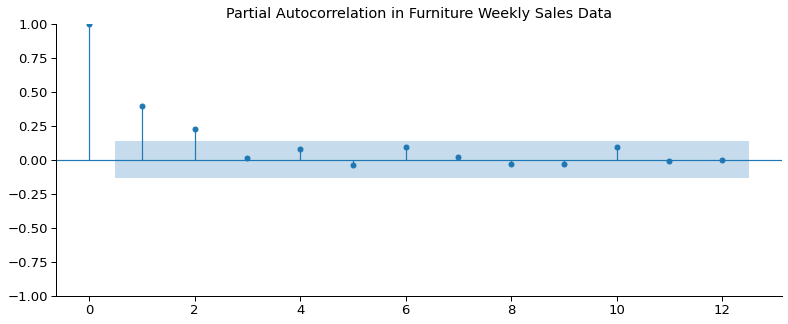

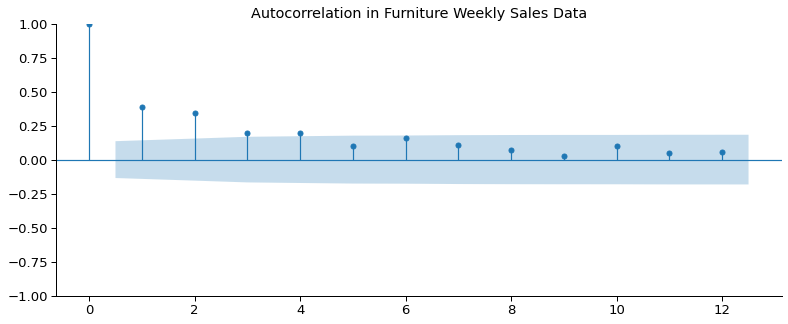

In [153]:
display(sales_weekly.head())
pacf_plot = plot_pacf(sales_weekly['Furniture'], lags=12, title='Partial Autocorrelation in Furniture Weekly Sales Data')
acf_plot = plot_acf(sales_weekly['Furniture'], lags=12, title='Autocorrelation in Furniture Weekly Sales Data')

Category,Furniture,Office Supplies,Technology
2011-01-31,"5,951.86","4,851.08","3,143.29"
2011-02-28,"2,130.32","1,071.72","1,608.51"
2011-03-31,"14,573.96","8,605.88","32,511.17"
2011-04-30,"7,944.84","11,155.07","9,195.43"
2011-05-31,"6,912.79","7,135.62","9,599.88"
2011-06-30,"13,206.13","12,953.04","8,435.97"
2011-07-31,"10,821.05","15,121.21","8,004.13"
2011-08-31,"7,320.35","11,379.46","9,209.66"
2011-09-30,"23,816.48","27,423.30","30,537.57"
2011-10-31,"12,304.25","7,211.13","11,938.02"


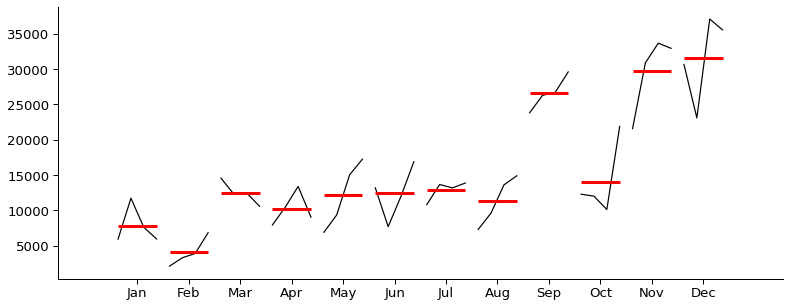

In [149]:
display(sales_monthly.head(12))
m_plot = month_plot(sales_monthly['Furniture'])

Category,Furniture,Office Supplies,Technology
2011-03-31,"22,656.14","14,528.68","37,262.97"
2011-06-30,"28,063.75","31,243.74","27,231.28"
2011-09-30,"41,957.88","53,923.97","47,751.37"
2011-12-31,"64,515.09","52,080.03","63,032.62"
2012-03-31,"27,374.10","23,059.39","18,418.25"
2012-06-30,"27,564.83","32,320.04","29,239.32"
2012-09-30,"49,586.04","35,760.81","44,912.73"
2012-12-31,"65,993.28","46,093.21","70,210.52"


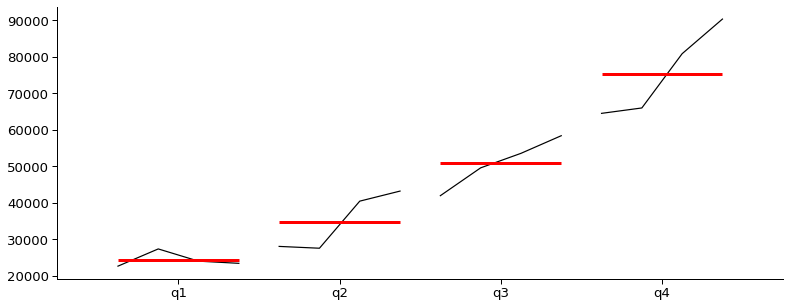

In [151]:
display(sales_quarterly.head(8))
q_plot= quarter_plot(sales_quarterly['Furniture'])

# Exercises

## Exercise 1
Set up monthly data by either **resampling** or grouping data by year and month

In [165]:
new_vars= ['Segment', 'Profit', 'Order Date', 'Sales']
# display(df.head())
new_base= df[new_vars].set_index('Order Date')
display(new_base)
prof_pivot= new_base.pivot_table(columns= "Segment", index= "Order Date")
display(prof_pivot.head())
prof_month= prof_pivot.resample('M').sum()
prof_month.head(12)

,Segment,Profit,Sales
Order Date,,,
2013-11-09,Consumer,41.91,261.96
2013-11-09,Consumer,219.58,731.94
2013-06-13,Corporate,6.87,14.62
2012-10-11,Consumer,-383.03,957.58
2012-10-11,Consumer,2.52,22.37
...,...,...,...
2011-01-22,Consumer,4.10,25.25
2014-02-27,Consumer,15.63,91.96
2014-02-27,Consumer,19.39,258.58


Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-04     5.55       NaN         NaN    16.45       NaN         NaN
2011-01-05      NaN       NaN      -22.00      NaN       NaN       96.02
2011-01-06     4.88       NaN         NaN    19.54       NaN         NaN
2011-01-07     9.33      5.24      191.93    19.44     12.78      624.98
2011-01-08   -35.98       NaN         NaN    43.58       NaN         NaN

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-31   106.51      5.95      185.01 1,304.14    567.99      855.95
2011-02-28   228.28    126.05       37.85 1,442.71    464.12      104.12
2011-03-31   -26.53    131.27       73.75 3,777.77  1,988.43    4,439.86
2011-04-30   336.91    435.61      527.88 3,752.78  3,951.19    2,031.59
2011-05-31   484.03    872.96      -63.33 5,373.21  4,077.72      696.09
2011-06-30   514.80    190.53      311.05 5,027.03  1,754.90    1,041.60
2011-07-31   247.46    556.78       71.76 5,285.90  4,168.17    1,649.28
2011-08-31   194.76    752.84      265.50 4,280.38  2,390.16    1,271.26
2011-09-30   927.65   -146.82      292.81 9,115.45  4,218.01    2,252.51
2011-10-31   703.46    230.63      147.92 5,825.23  2,864.76    1,214.67
2011-11-30   656.73    761.50      931.75 7,602.06  3,786.30    3,564.29
2011-12-31   767.54    489.17      529.98 6,407.67  6,118.99    2,977.98

## Exercise 2
See monthly pattern and PACF

In [194]:
# prof_month['Profit'].plot(title= "Monthly Profit")
# plt.show()

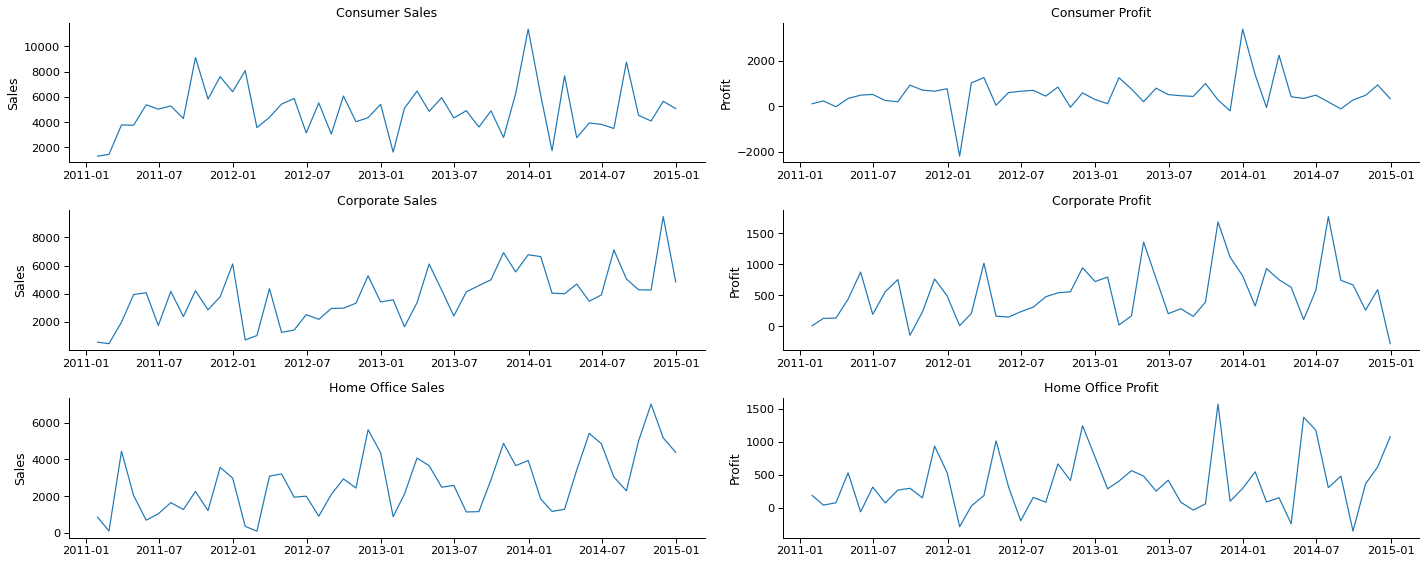

In [193]:
sns.set_context("paper", font_scale= 1.3)
fig, axes= plt.subplots(3,2, figsize= (20,8))

for i, cat in enumerate(['Consumer', 'Corporate', 'Home Office']):
    for j, money in enumerate(['Sales', 'Profit']):
        axes[i,j].plot(prof_month[money, cat])
        axes[i,j].title.set_text(cat+" "+money)
        axes[i,j].set_ylabel(money)
    
fig.tight_layout()
plt.show()

/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting

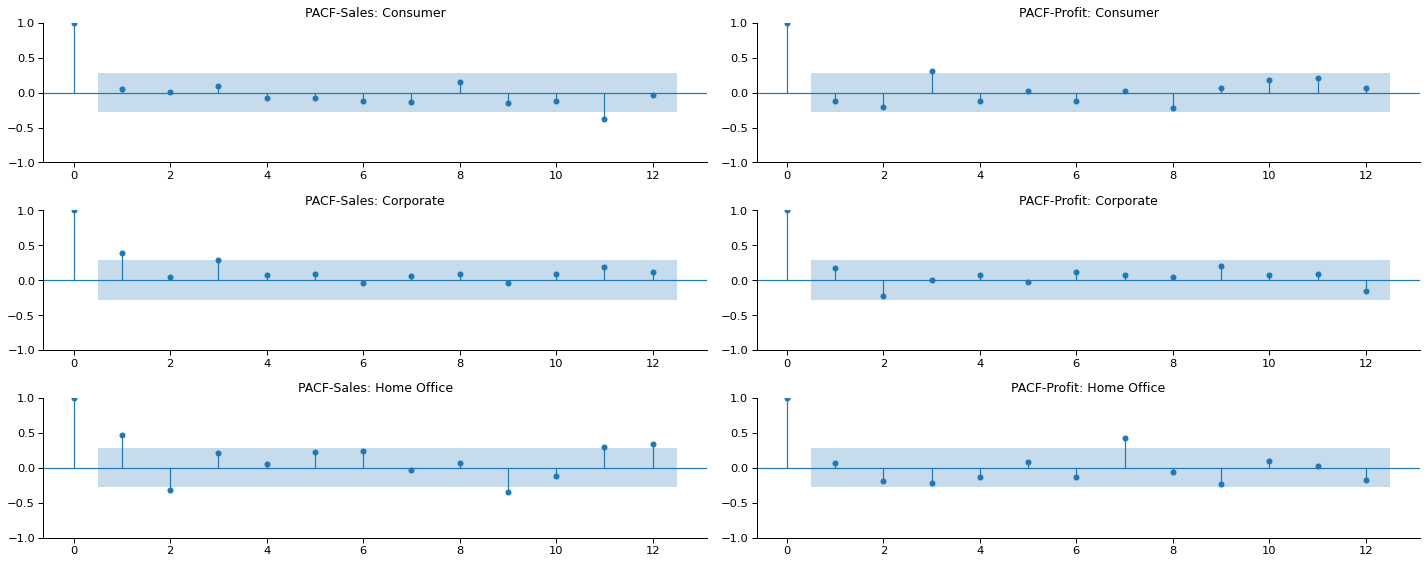

In [208]:
sns.set_context("paper", font_scale= 1.3)
fig, axes= plt.subplots(3,2, figsize= (20,8))

for i, cat in enumerate(['Consumer', 'Corporate', 'Home Office']):
    for j, money in enumerate(['Sales', 'Profit']):
        plot_pacf(prof_month[money, cat], ax= axes[i,j], title= "PACF-"+money+": "+cat, lags= 12)
    
fig.tight_layout()
plt.show()

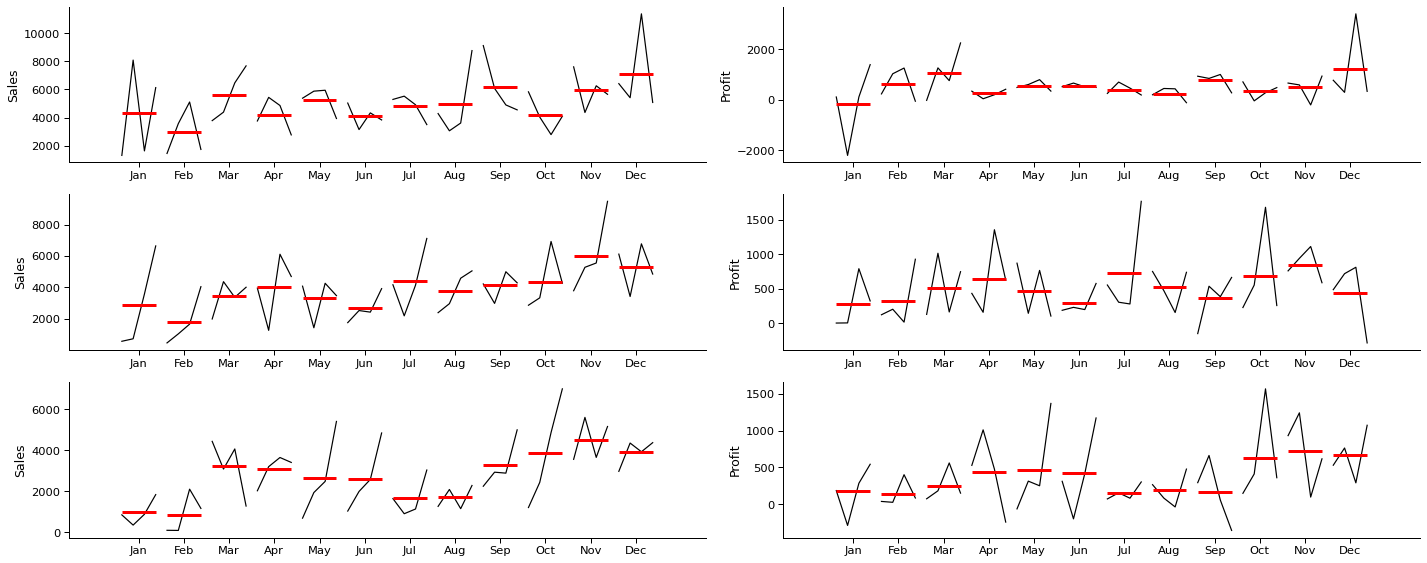

In [206]:
sns.set_context("paper", font_scale= 1.3)
fig, axes= plt.subplots(3,2, figsize= (20,8))

for i, cat in enumerate(['Consumer', 'Corporate', 'Home Office']):
    for j, money in enumerate(['Sales', 'Profit']):
        month_plot(prof_month[money, cat], ax= axes[i,j], ylabel= money)
    
fig.tight_layout()
plt.show()

## Exercise 3
Develop a function for EDA

In [211]:
cat_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']

def monthly_eda(cat_var=cat_var,
                date_var=date_var, 
                money_vars=money_vars):
    new_vars = [cat_var, date_var] + money_vars
    cats = list(df[cat_var].unique())
    num_cats = len(cats)
    new_base = df[new_vars].set_index(date_var)
    prof_pivot = new_base.pivot_table(columns=cat_var,index = date_var)
    prof_month = prof_pivot.resample('M').sum()
    prof_month.head()

    fig,axes = plt.subplots(num_cats*3, 2, figsize=(20, 5*num_cats),)
    for i,cat in enumerate(cats):
        for j,money in enumerate(money_vars):
            axes[i,j].plot(prof_month[money,cat])
            axes[i,j].title.set_text(cat+" "+money)
            fig = plot_pacf(prof_month[money,cat],ax=axes[i+num_cats,j],title = cat+" "+money+" ACF")
            fig = month_plot(prof_month[money,cat],ax=axes[i+num_cats*2,j])
            axes[i+num_cats*2,j].title.set_text(cat+" Seasonality")

    fig.tight_layout()
    plt.show()

/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/razielar/miniconda3/envs/time-series/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting

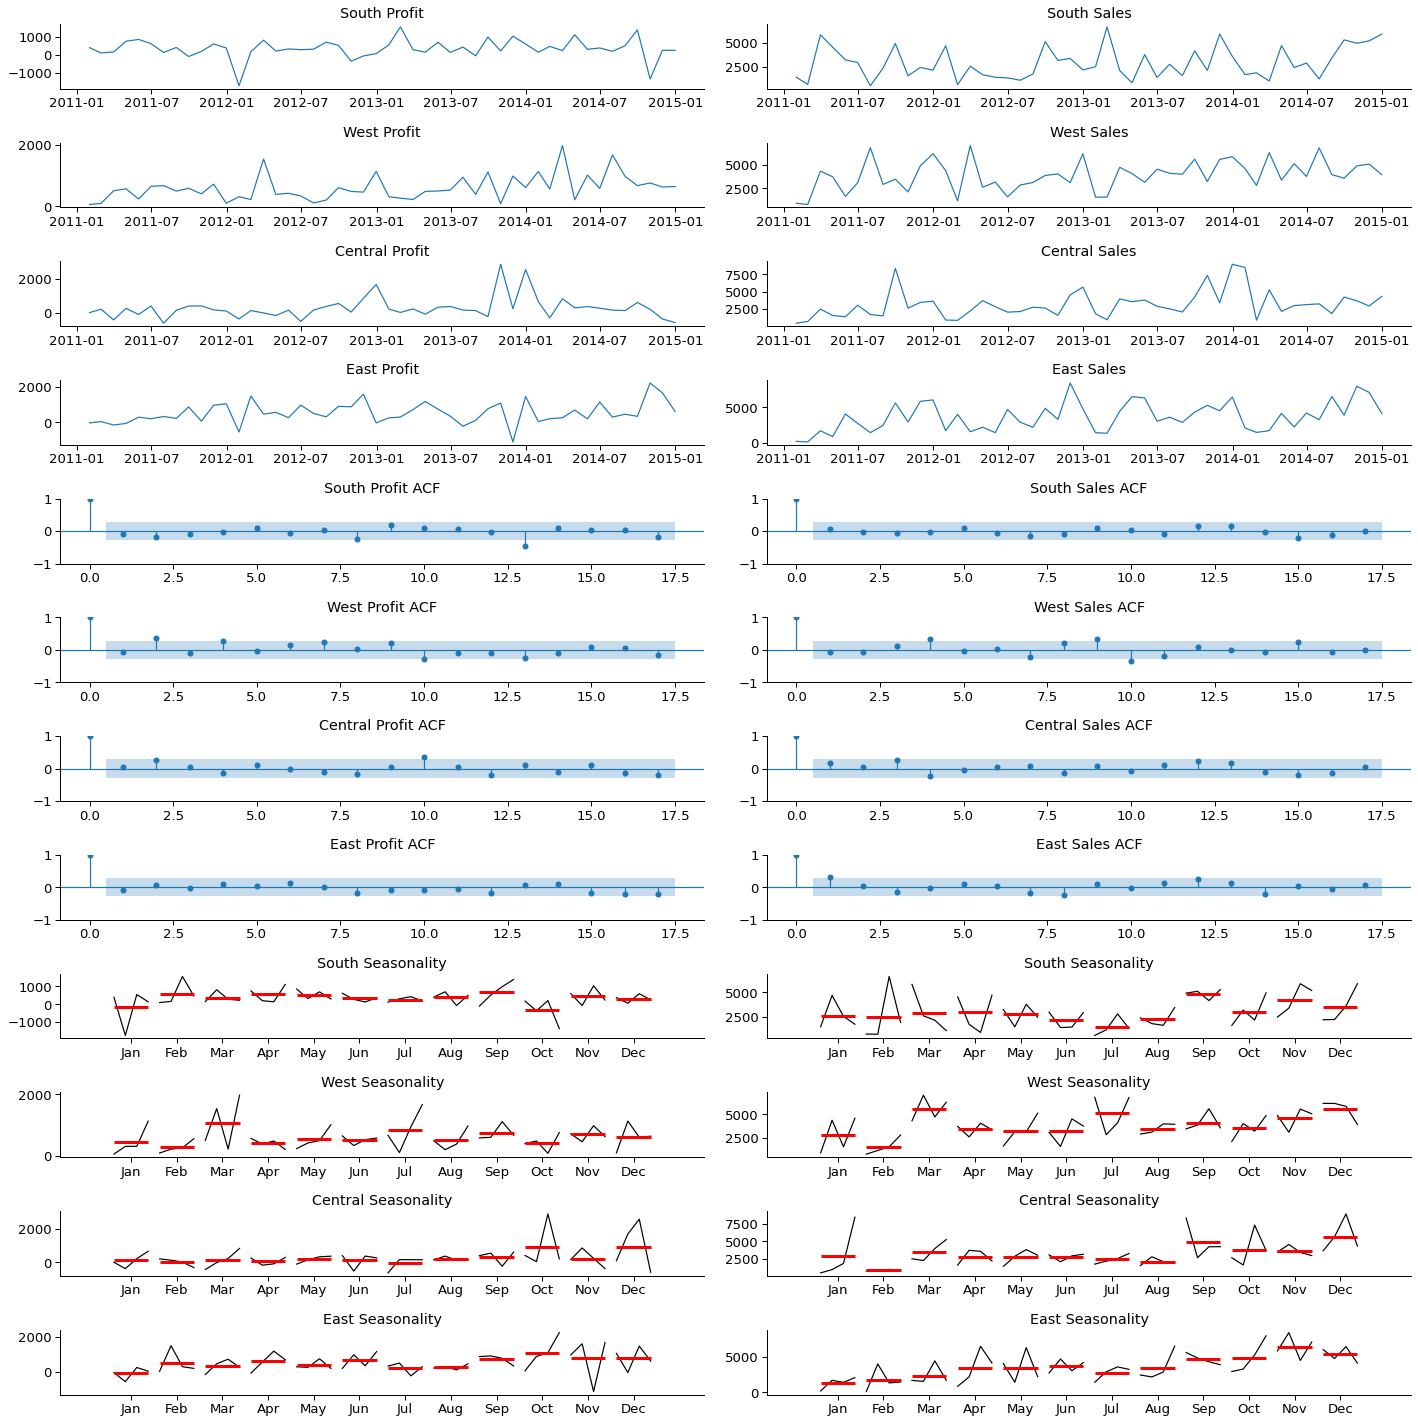

In [214]:
monthly_eda(cat_var='Region')